In [60]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
import warnings
warnings.filterwarnings("ignore")

# Dataset Loading

In [62]:
iris = load_iris()

# Exploration on Iris Dataset

In [63]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [64]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [65]:
df.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [66]:
print("NULL Count:")
df.isnull().sum()

NULL Count:


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [67]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# Data Visualization

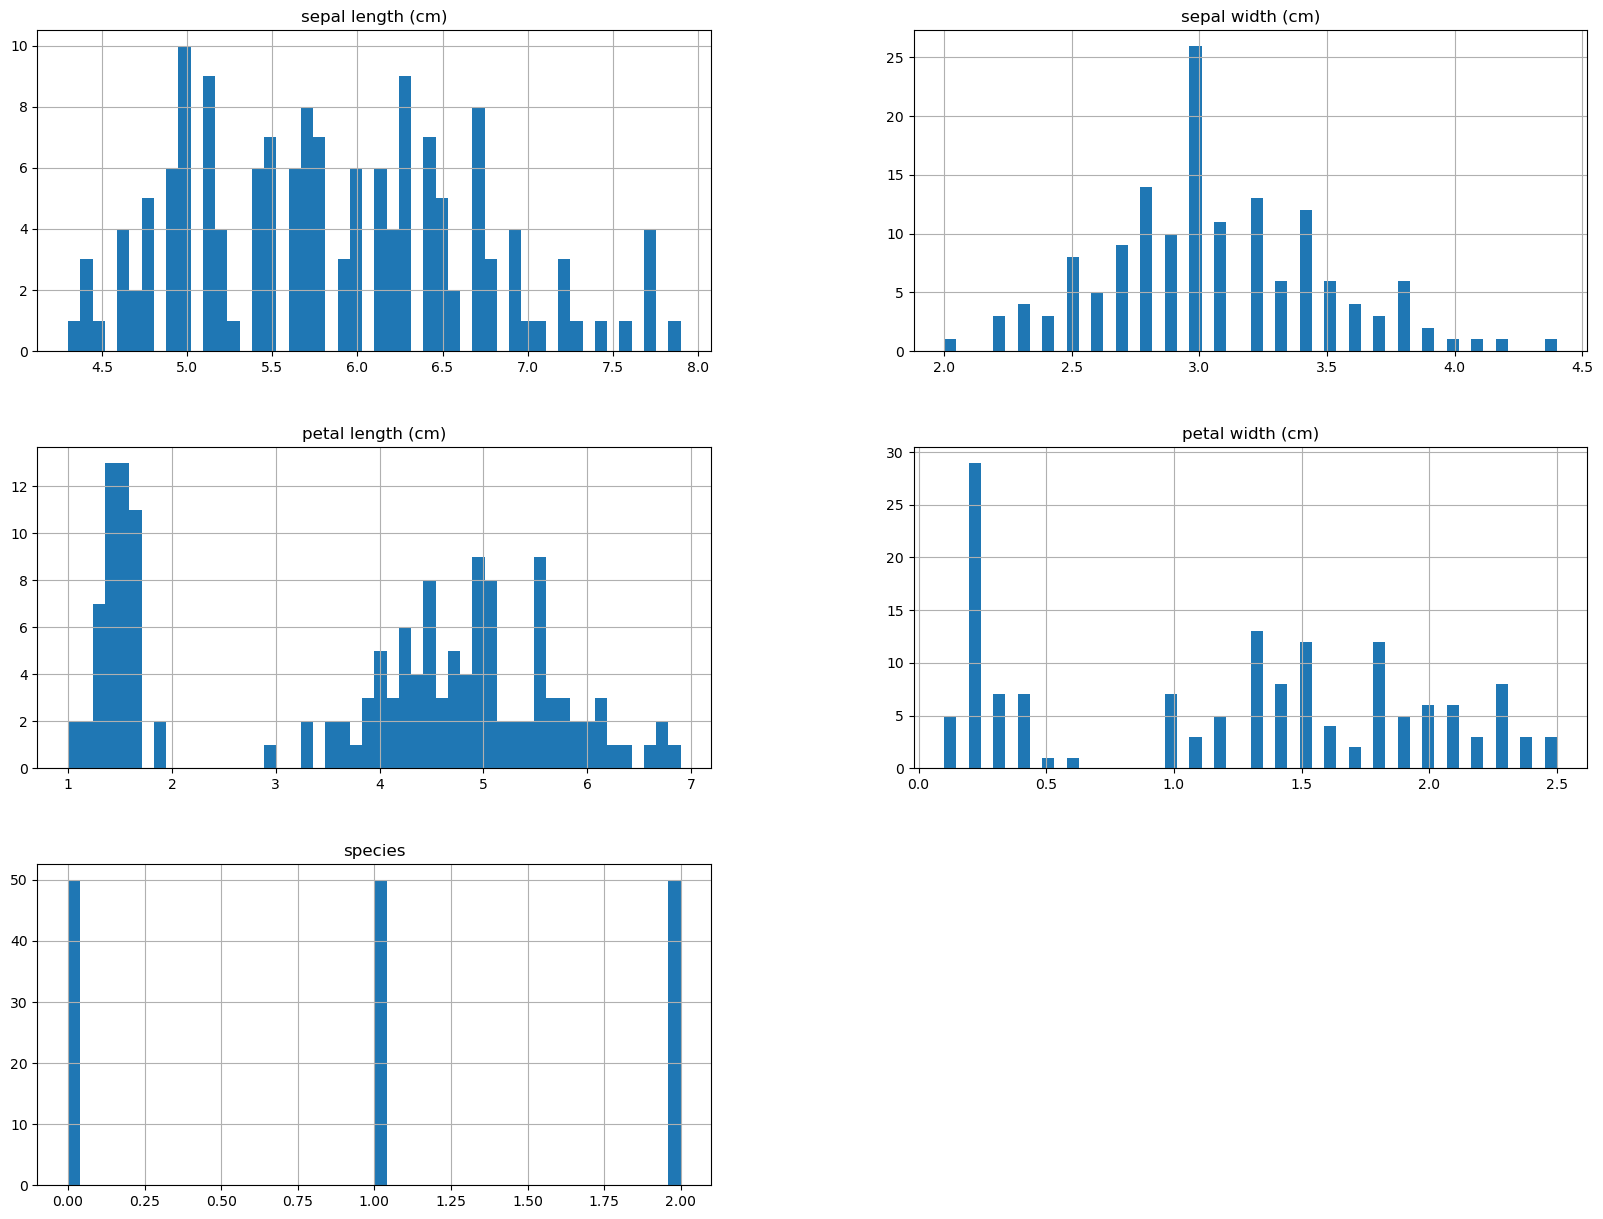

In [69]:
df.hist(bins=50, figsize=(20,15))
plt.show()

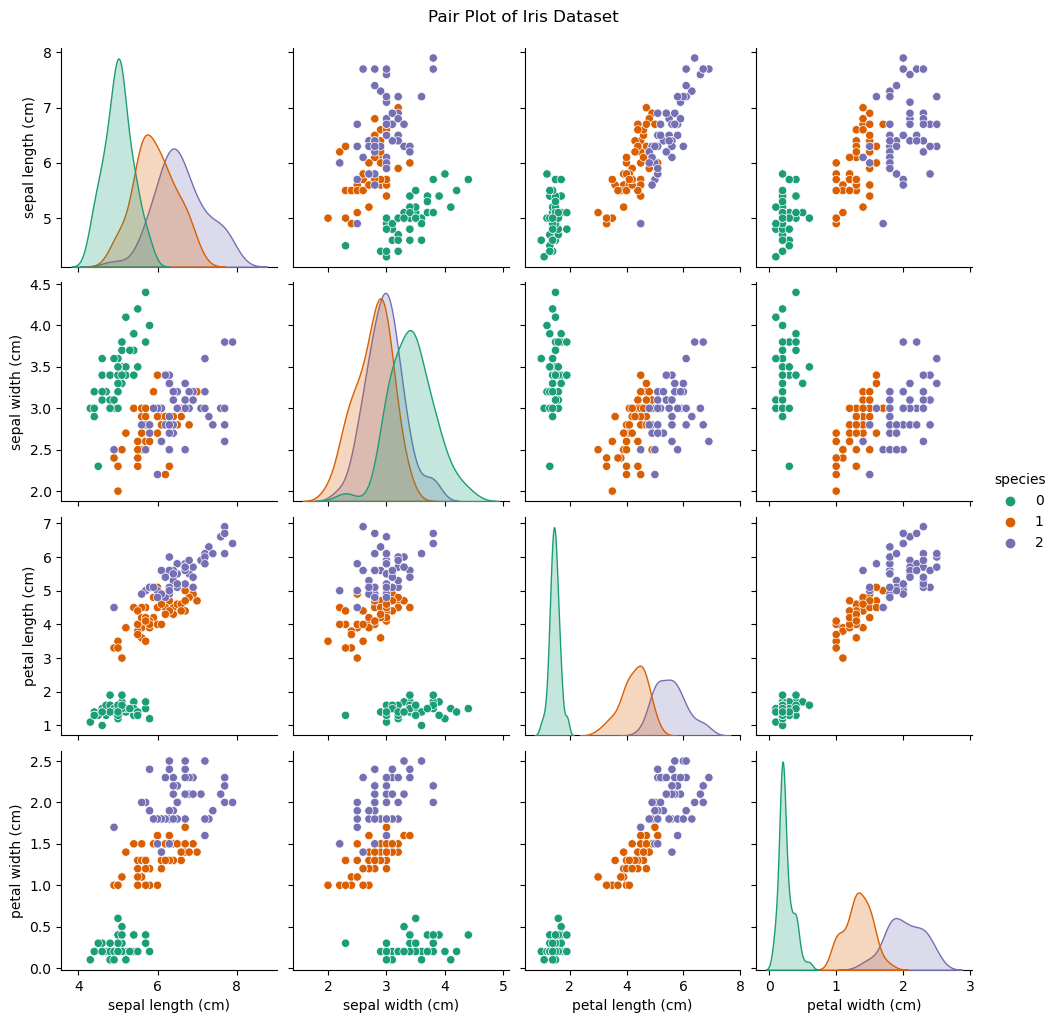

In [70]:
# Pair Plot
sns.pairplot(df, hue='species', palette='Dark2')
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()

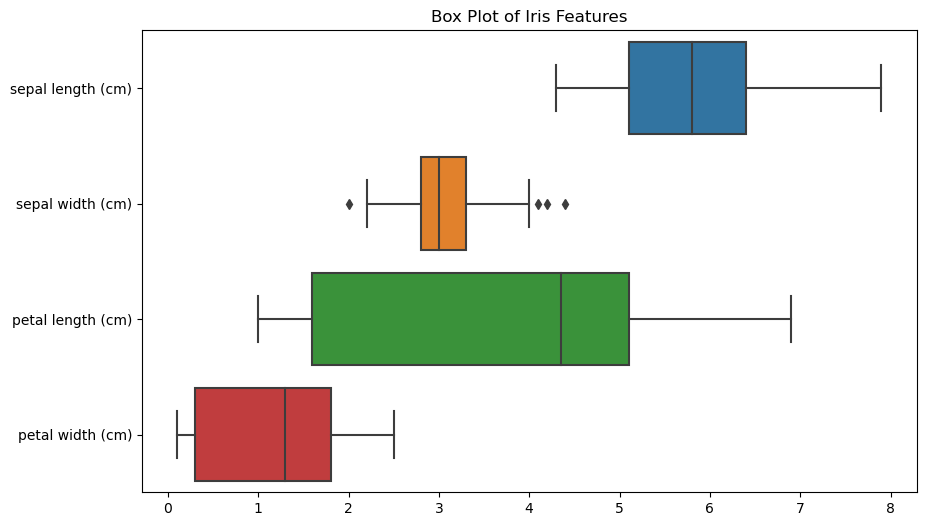

In [71]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['species']), orient='h')
plt.title('Box Plot of Iris Features')
plt.show()

array([[<Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>],
       [<Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
    

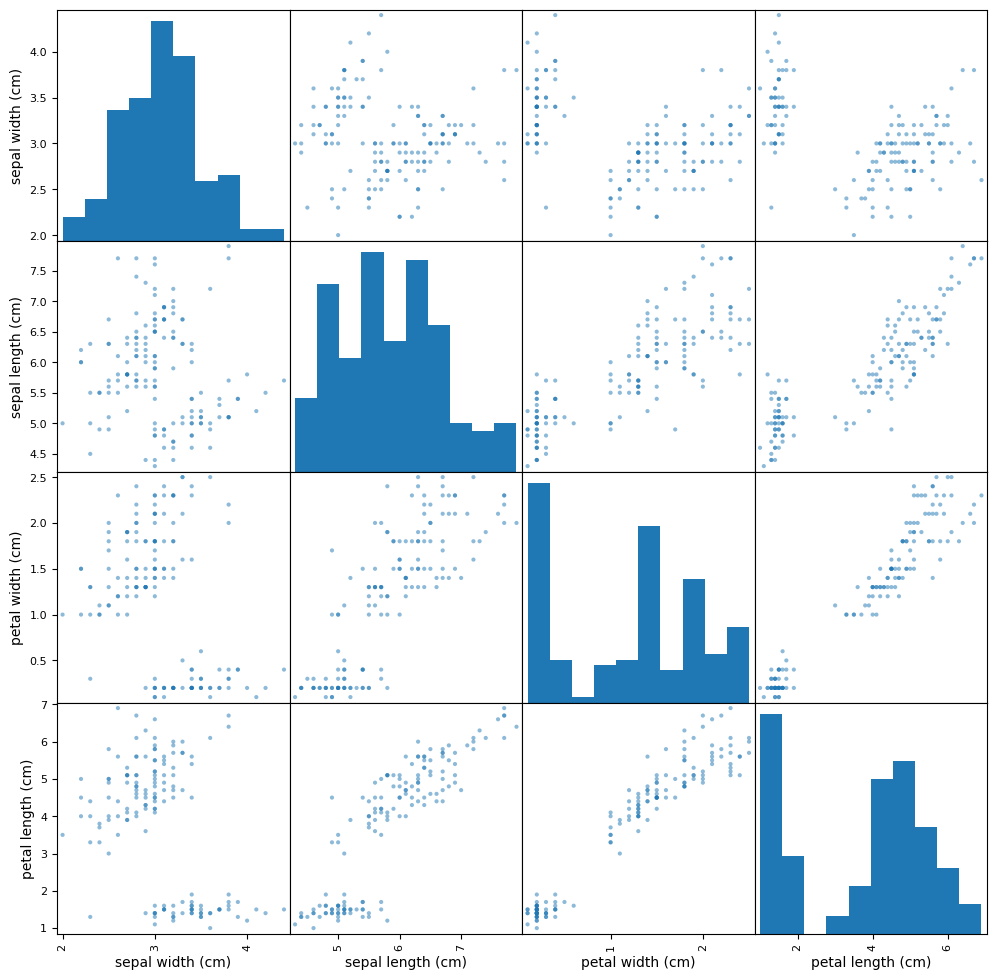

In [72]:
from pandas.plotting import scatter_matrix

attributes = ['sepal width (cm)', 'sepal length (cm)', 'petal width (cm)', 'petal length (cm)']
scatter_matrix(df[attributes], figsize = (12,12))

# Correlation Matrix

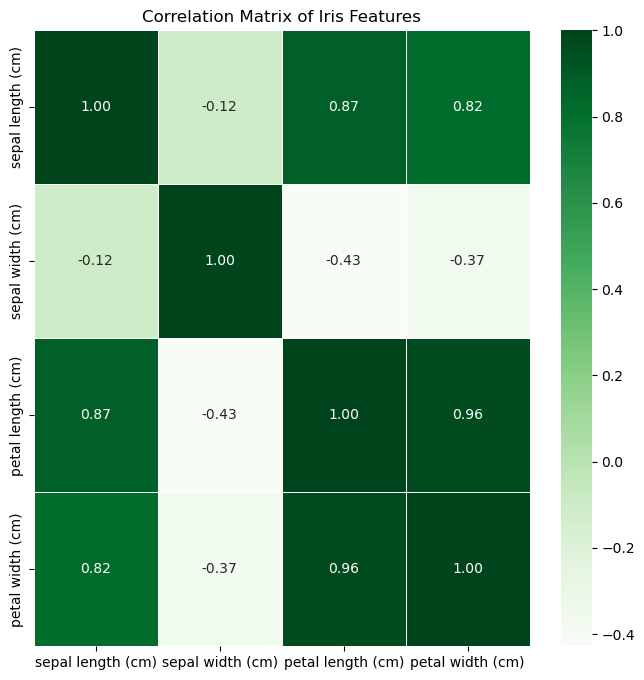

In [73]:
df_new = df.drop('species', axis=1)
correlation_matrix = df_new.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Iris Features')
plt.show()

# Train Test Split Model

In [74]:
y = iris.data[:, 0]  # sepal length
X = iris.data[:, 1].reshape(-1, 1) # sepal width

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
len(X), len(y)

(150, 150)

In [76]:
len(X_train), len(y_train)

(105, 105)

In [77]:
len(X_test), len(y_test)

(45, 45)

# Build & Train Model

In [78]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Performance Evaluation

In [79]:
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Training Mean Squared Error:", train_mse)

Training Mean Squared Error: 0.6870397840083694


In [80]:
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Testing Mean Squared Error:", test_mse)

Testing Mean Squared Error: 0.6516783204867566


# Model Prediction

In [82]:
X_new = X_test[5:10, :]
y_new = y_test[5:10]

y_new_pred = model.predict(X_new)

mse_new_data = mean_squared_error(predictions, random_samples[:,0])
print(y_new)
print(y_new_pred)
print("Mean Squared Error on new data points:", mse_new_data)

[5.4 5.6 6.9 6.2 5.8]
[5.81733549 5.85001566 5.83694359 5.89576789 5.86308772]
Mean Squared Error on new data points: 4.091438761234845


# K-Fold Cross Validation Model

In [83]:
model = LinearRegression()

kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

mse_cv = -cv_scores.mean()
print("Mean Squared Error using 10-fold Cross-Validation:", mse_cv)

Mean Squared Error using 10-fold Cross-Validation: 0.6879333727462045
